In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zscore import zscore
from minmax import minmax
from mylinearregression import MyLinearRegression as MyLR
from data_splitter import data_splitter
from polynomial_model import add_polynomial_features

In [3]:
d = pd.read_csv("../space_avocado.csv")
d.head()

,Unnamed: 0,weight,prod_distance,time_delivery,target
0,0,82.0,1467.0,5.0,798952.470207
1,1,28.0,2043.0,9.0,576947.962724
2,2,73.0,2416.0,7.0,720237.012328
3,3,55.0,2488.0,8.0,677671.772464
4,4,37.0,1335.0,3.0,675912.265367


In [4]:
X = np.array(d[['weight', 'prod_distance', 'time_delivery']])
Y = np.array(d[['target']])
Xm = minmax(X)
Ym = minmax(Y)
print("X", X)
print("Y", Y)
print("Xm", Xm)
print("Ym", Ym)

X [[8.200e+01 1.467e+03 5.000e+00]
 [2.800e+01 2.043e+03 9.000e+00]
 [7.300e+01 2.416e+03 7.000e+00]
 ...
 [1.900e+01 2.471e+03 3.000e+00]
 [4.600e+01 1.731e+03 9.000e+00]
 [1.000e+00 1.783e+03 2.000e+00]]
Y [[798952.47020694]
 [576947.96272441]
 [720237.0123281 ]
 ...
 [543466.83235214]
 [674279.55218247]
 [481293.89583362]]
Xm [[2.75979557e-02 4.99488927e-01 1.36286201e-03]
 [9.19931857e-03 6.95741056e-01 2.72572402e-03]
 [2.45315162e-02 8.22827939e-01 2.04429302e-03]
 ...
 [6.13287905e-03 8.41567291e-01 6.81431005e-04]
 [1.53321976e-02 5.89437819e-01 2.72572402e-03]
 [0.00000000e+00 6.07155026e-01 3.40715503e-04]]
Ym [[0.8860618 ]
 [0.3270917 ]
 [0.68786948]
 ...
 [0.24279183]
 [0.57215631]
 [0.08625081]]


In [5]:
x0 = add_polynomial_features(Xm[:,0], 2)
x1 = add_polynomial_features(Xm[:,1], 3)
x2 = add_polynomial_features(Xm[:,2], 1)
print(x0)
print(x1)
print(x2)

[[2.75979557e-02 7.61647159e-04]
 [9.19931857e-03 8.46274621e-05]
 [2.45315162e-02 6.01795286e-04]
 ...
 [6.13287905e-03 3.76122054e-05]
 [1.53321976e-02 2.35076284e-04]
 [0.00000000e+00 0.00000000e+00]]
[[0.49948893 0.24948919 0.12461709]
 [0.69574106 0.48405562 0.33677737]
 [0.82282794 0.67704582 0.55709221]
 ...
 [0.84156729 0.70823551 0.59602784]
 [0.58943782 0.34743694 0.20479247]
 [0.60715503 0.36863723 0.22381994]]
[[0.00136286]
 [0.00272572]
 [0.00204429]
 ...
 [0.00068143]
 [0.00272572]
 [0.00034072]]


In [6]:
Xl = np.c_[x0, x1, x2]
print(Xl)

[[2.75979557e-02 7.61647159e-04 4.99488927e-01 2.49489188e-01
  1.24617087e-01 1.36286201e-03]
 [9.19931857e-03 8.46274621e-05 6.95741056e-01 4.84055617e-01
  3.36777366e-01 2.72572402e-03]
 [2.45315162e-02 6.01795286e-04 8.22827939e-01 6.77045817e-01
  5.57092214e-01 2.04429302e-03]
 ...
 [6.13287905e-03 3.76122054e-05 8.41567291e-01 7.08235506e-01
  5.96027836e-01 6.81431005e-04]
 [1.53321976e-02 2.35076284e-04 5.89437819e-01 3.47436943e-01
  2.04792474e-01 2.72572402e-03]
 [0.00000000e+00 0.00000000e+00 6.07155026e-01 3.68637225e-01
  2.23819944e-01 3.40715503e-04]]


In [7]:
clean_set = data_splitter(Xl, Ym, 0.80)
Y_TRAIN = clean_set[2]
X_TRAIN = clean_set[0]
Y_TEST = clean_set[3]
X_TEST = clean_set[1]

In [8]:
myLR_f = MyLR([[0],[0],[0],[0],[0],[0],[0]])
myLR_f.theta = myLR_f.normal_equation(X_TRAIN, Y_TRAIN)
print(f"theta : {myLR_f.theta}")
print(myLR_f.mse_(myLR_f.predict_(X_TEST), Y_TEST))

theta : [[  -0.99435671]
 [  36.82454586]
 [-390.10113321]
 [   6.97680012]
 [ -12.99451175]
 [   7.3048665 ]
 [  -0.92305858]]
4.49887773949288e-05


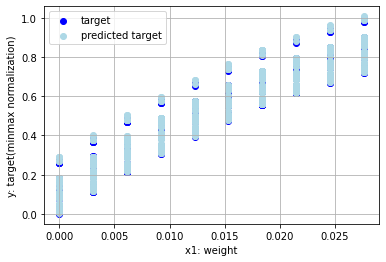

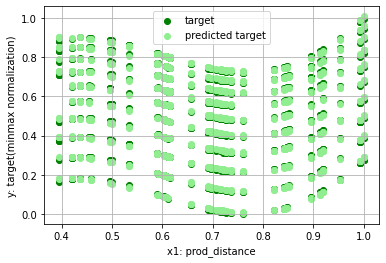

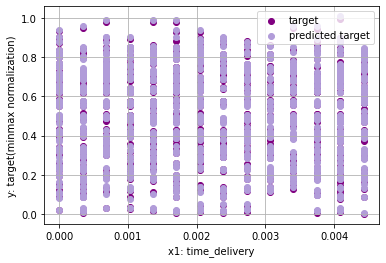

In [9]:
myLR_f.plot_uni(X_TEST[:,0], Y_TEST, myLR_f.predict_(X_TEST), "x1: weight", "y: target(minmax normalization)", "target", "predicted target")
myLR_f.plot_uni(X_TEST[:,2], Y_TEST, myLR_f.predict_(X_TEST), "x1: prod_distance", "y: target(minmax normalization)", "target", "predicted target", coly='green', colyh='lightgreen')
myLR_f.plot_uni(X_TEST[:,5], Y_TEST, myLR_f.predict_(X_TEST), "x1: time_delivery", "y: target(minmax normalization)", "target", "predicted target", coly='purple', colyh='#b19cd9')